In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/zoo-animal-classification/class.csv
/kaggle/input/zoo-animal-classification/zoo.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [3]:
class1 = pd.read_csv("../input/zoo-animal-classification/class.csv")
df = pd.read_csv("../input/zoo-animal-classification/zoo.csv")
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
check = df.duplicated(keep='first')
sum(check)

0

In [5]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df.isnull().any()

animal_name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
class_type     False
dtype: bool

In [7]:
df.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [8]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
check = df.duplicated(keep='first')
sum(check)

0

In [10]:
df["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [11]:
df = pd.read_csv("../input/zoo-animal-classification/zoo.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
df.shape

(101, 18)

In [13]:
list(df)

['animal_name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [14]:
df.drop("animal_name", axis=1, inplace=True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [15]:
df.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [16]:
df.dtypes

hair          int64
feathers      int64
eggs          int64
milk          int64
airborne      int64
aquatic       int64
predator      int64
toothed       int64
backbone      int64
breathes      int64
venomous      int64
fins          int64
legs          int64
tail          int64
domestic      int64
catsize       int64
class_type    int64
dtype: object

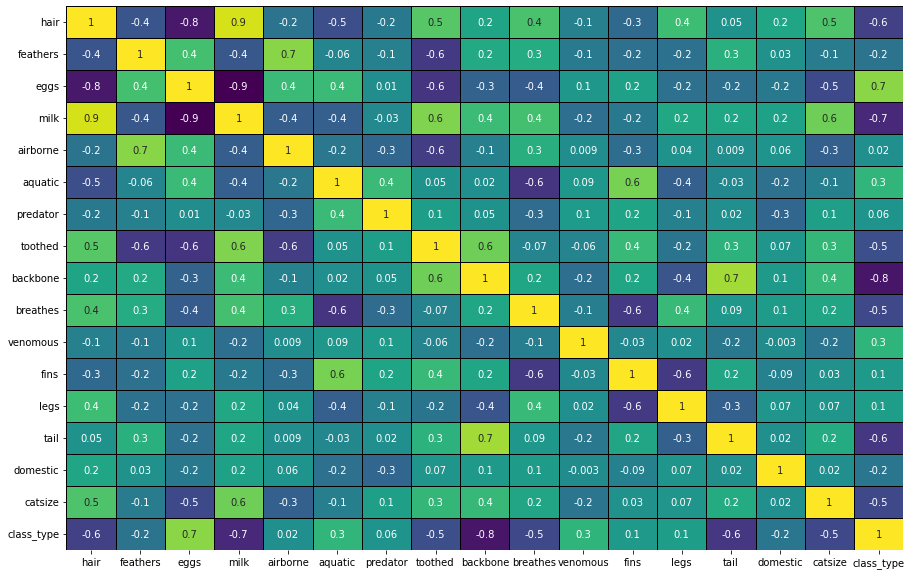

In [17]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black');

In [18]:
NumberofPlayers = df.groupby(pd.Grouper(key='class_type')).size().reset_index(name='count')
fig = px.treemap(NumberofPlayers, path=['class_type'], values='count')
fig.update_layout(title_text='Animal Class Types Distribution Tree',
                  title_x=0.5, title_font=dict(size=25))
fig.update_traces(textinfo="label+value")

fig.show()

In [19]:
x = df['class_type'].value_counts().index.tolist()
y = df['class_type'].value_counts().tolist()

fig = px.bar(x=x, y=y, color=x, title="Animal Class Type Distribution",
             labels={
                'x': 'Animal Class',
                'y': 'count'
                },)
fig.show()

In [20]:
labels = ["Type 1","Type 2","Type 3","Type 4","Type 5","Type 6","Type 7"]
values = df['class_type'].value_counts().tolist()

px.pie(df, values=values, names=labels, title="Animal Class Type Distribution Pie Chart")

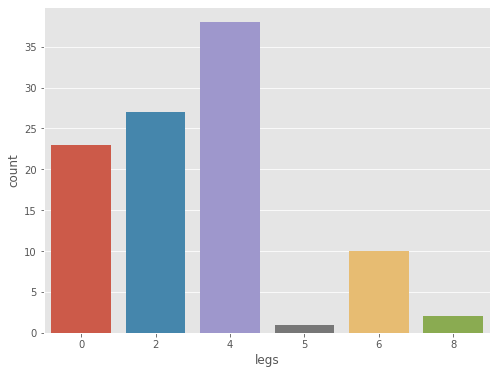

In [21]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["legs"]);

In [22]:
# X data
X = df.drop("class_type", axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [23]:
# y data
y = df["class_type"]
y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
len(X_train), len(X_test)

(70, 31)

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
RandomForestClassifierScore = rf.score(X_train,y_train)
print("RanFor_train:",RandomForestClassifierScore)

RanFor_train: 1.0


In [28]:
RandomForestClassifierScore = rf.score(X_test, y_test)
print("RanFor_test:",RandomForestClassifierScore)

RanFor_test: 0.9354838709677419


In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
LinearRegressionScore = lr.score(X_train, y_train)
print("Linear_train :",LinearRegressionScore)

Linear_train : 0.9842833924239515


In [31]:
LinearRegressionScore = lr.score(X_test, y_test)
print("Linear_test :",LinearRegressionScore)

Linear_test : 0.9640058485958375


In [32]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 1.1721563	total: 63.8ms	remaining: 574ms
1:	learn: 0.8594476	total: 68.6ms	remaining: 274ms
2:	learn: 0.6727791	total: 72.5ms	remaining: 169ms
3:	learn: 0.5178350	total: 75.5ms	remaining: 113ms
4:	learn: 0.4379085	total: 81ms	remaining: 81ms
5:	learn: 0.3683583	total: 85.5ms	remaining: 57ms
6:	learn: 0.3269679	total: 90ms	remaining: 38.6ms
7:	learn: 0.2951029	total: 94ms	remaining: 23.5ms
8:	learn: 0.2643063	total: 96.8ms	remaining: 10.8ms
9:	learn: 0.2310631	total: 101ms	remaining: 0us


In [33]:
CatBoostClassifierScore = cat.score(X_train, y_train)
print("CatBoost_Train :",CatBoostClassifierScore)

CatBoost_Train : 0.9857142857142858


In [34]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("CatBoost_Test :",CatBoostClassifierScore)

CatBoost_Test : 0.967741935483871


In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, r_regression
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scl', MinMaxScaler()),
    ('fs', SelectKBest(chi2)), 
    ('lr', LogisticRegression(random_state=0))
])
params = {
    "fs__k": [2,5,10],
    "lr__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],     
}
clf = GridSearchCV(pipe, params)
clf.fit(X_train,y_train)
print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

Best parameter (CV score=0.929):
{'fs__k': 10, 'lr__C': 10}


In [36]:
clf.cv_results_

{'mean_fit_time': array([0.02914681, 0.02116246, 0.01383405, 0.01042423, 0.01092663,
        0.01528049, 0.01857719, 0.02901359, 0.02080712, 0.01499553,
        0.01094022, 0.0103941 , 0.01385469, 0.02126307, 0.03082147,
        0.02077842, 0.01498604, 0.01314335, 0.01452708, 0.02084765,
        0.02539458]),
 'std_fit_time': array([0.00470828, 0.00157437, 0.00065305, 0.0003921 , 0.00089179,
        0.00102413, 0.00213334, 0.00364711, 0.00193111, 0.00073351,
        0.0003382 , 0.00029536, 0.00091367, 0.00046436, 0.00376528,
        0.00143653, 0.0010581 , 0.0009063 , 0.00063779, 0.00066896,
        0.00175613]),
 'mean_score_time': array([0.00233345, 0.00272994, 0.00231876, 0.00236726, 0.00226212,
        0.00230584, 0.0023128 , 0.00227017, 0.00232186, 0.00227666,
        0.0022203 , 0.00220532, 0.00230155, 0.00235806, 0.00228486,
        0.00227575, 0.00227857, 0.00225954, 0.00235443, 0.00264173,
        0.00227828]),
 'std_score_time': array([4.38590142e-05, 4.24032424e-04, 1.153773

In [37]:
yp = clf.predict(X_test)
sum(yp == y_test) / len(y_test)

0.967741935483871

In [38]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(n_estimators=111,learning_rate=0.01,boosting_type='gbdt',num_leaves=29,
                     class_weight=None,colsample_bytree=1.0, max_depth=-1,min_split_gain=0.0)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
LGBMClassifier = lr.score(X_train, y_train)
print("LGBM_train :",LGBMClassifier)

LGBM_train : 0.9842833924239515


In [40]:
LGBMClassifier = lr.score(X_test, y_test)
print("LGBM_test :",LGBMClassifier)

LGBM_test : 0.9640058485958375


In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.model_selection import cross_val_predict
clf = SVC(C=2, random_state=0)
yp = cross_val_predict(clf, X_train, y_train, cv=5)
train_acc = sum(yp==y_train)/len(y_train) # Training Accuacy
clf.fit(X_train,y_train)  # Train Model
yp = clf.predict(X_test) # Test Model
test_acc = sum(yp == y_test)/len(y_test) # Test Accuracy

In [42]:
train_acc

0.9428571428571428

In [43]:
test_acc

0.967741935483871